# 데이터 분포

변수를 몇개의 구간으로 나누어 각 구간별로 몇개의 데이터가 분포되어 있는지를 확인하는것

## 01. 도수분포

수집된 자료를 쉽게 이해할수 있도록 정리된 표

특정 항목 또는 범위에 속하는 빈도수를 나타낸 표

### 1. 주요개념

- 계급 : 자료가 취하는 전체 범위를 몇개의 소집단으로 나눈것
- 도수 : 각 계급에 속한느 자료 수 
- 상대도수 : 도수를 전체 자료의 수로 나눈 비율
- 도수분포표 : 대략적인 중심위치, 분포형태, 산포등을 파악하기 위한 표 

## #02. 작업 준비

### 1.패키지 가져오기


In [26]:
import sys
import numpy as np
from pandas import DataFrame, read_excel,melt
import seaborn as sb
from matplotlib import pyplot as plt

### 2. 데이터 가져오기

In [4]:
df = read_excel("https://data.hossam.kr/D02/ad-sales.xlsx", index_col="월")
df

,광고비(백만원),매출액(억원)
월,,
1월,2,100
2월,142,1690
3월,122,298
4월,130,390
5월,185,590
6월,121,200
7월,101,190
8월,199,460
9월,221,660


## #03. 도수분포

도수, 구간 = np.histogram(data,범위수)

### 1. numpy를 통한 도수분포 조회

In [10]:
hist,bins = np.histogram(df['매출액(억원)'],bins=5)
print(hist) ## 도수
print(bins) ## 구간

[6 4 1 0 1]
[ 100.  418.  736. 1054. 1372. 1690.]


### 2. 조회 결과를 도수분포표로 생성

In [12]:
info = []

for i,v in enumerate(hist) :
    if i+1 < len(hist) :
        tpl = "%d이상 %d미만"
    else : 
        tpl = "%d 이상 %d 미만"
    cls = tpl % (bins[i],bins[i+1])
    line = {"계급": cls,"도수" : v}
    info.append(line)

hist_df = DataFrame(info)
hist_df.set_index("계급",inplace=True)
hist_df

,도수
계급,
100이상 418미만,6
418이상 736미만,4
736이상 1054미만,1
1054이상 1372미만,0
1372 이상 1690 미만,1


### 3. 상대도수 파생변수 추가 

In [13]:
전체데이터수  = len(df)

hist_df['상대도수'] = hist_df['도수']/전체데이터수

hist_df

,도수,상대도수
계급,,
100이상 418미만,6,0.500000
418이상 736미만,4,0.333333
736이상 1054미만,1,0.083333
1054이상 1372미만,0,0.000000
1372 이상 1690 미만,1,0.083333


## #04. 히스토그램

- 도수분포표를 시각화 한 그래프

### 1. 그래프 기본설정

In [9]:

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 10

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (12,8)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

### 2. pyplot을 이용한 히스토그램

#### 1) 기본 사용 방법
데이터 원본을 사용해서 시각화

x축을 pyplot이 임의로 지정하기 떄문에 데이터 구간파악 하기 어렵다 .


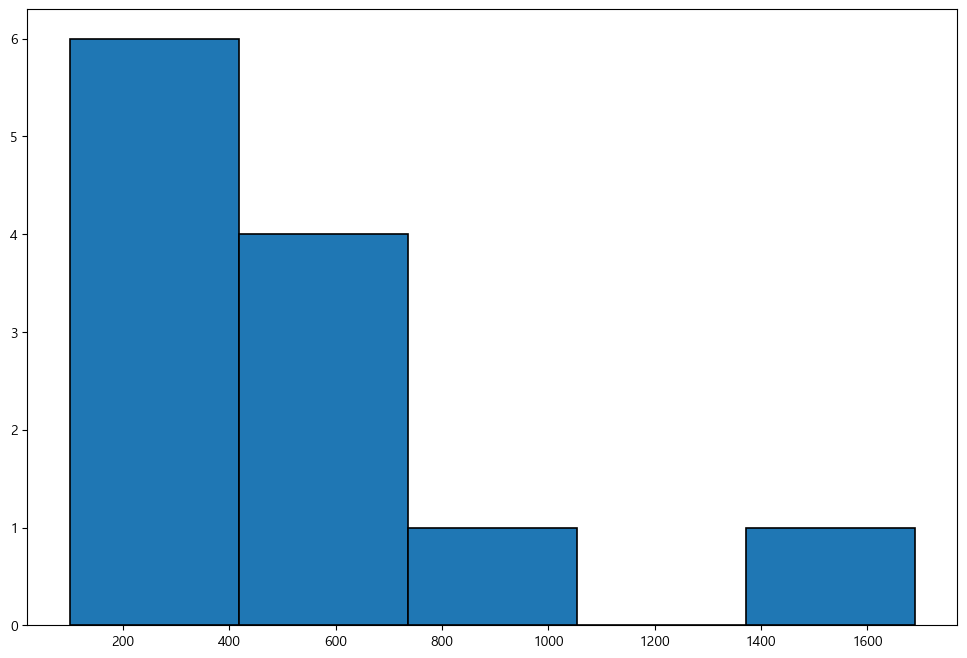

In [14]:
plt.figure()

plt.hist(df['매출액(억원)'],bins=5,edgecolor='black', linewidth=1.2)

plt.show()
plt.close()


#### 2) x축 설정하기

np.histogram() 매서드를 사용해서 데이터 구간정보를 리턴받은 후 그래프의 xticks()적용

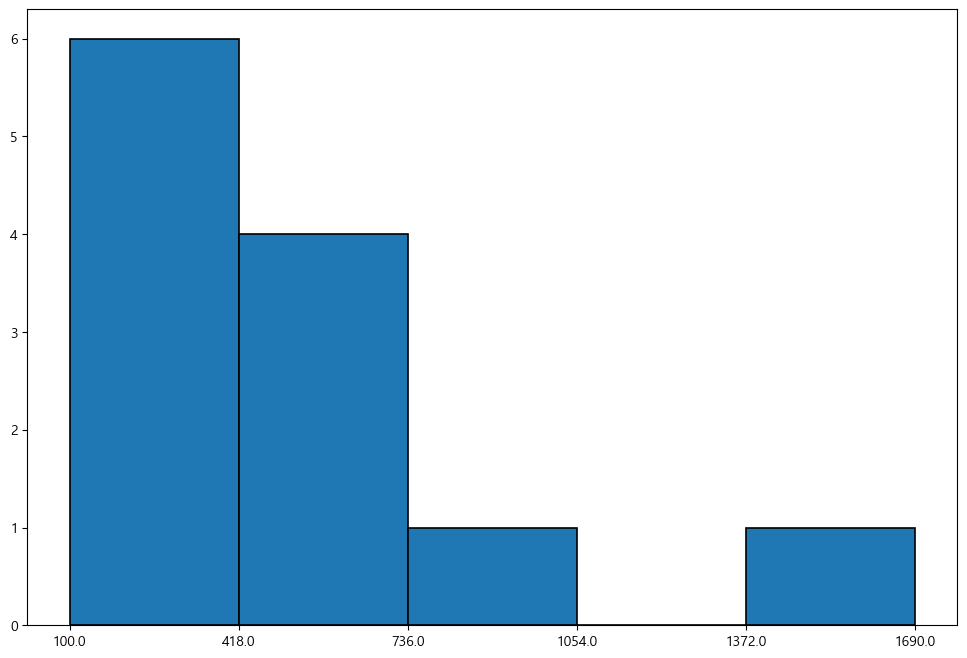

In [16]:
hist, bins = np.histogram(df['매출액(억원)'],bins=5)

plt.figure()
plt.hist(df['매출액(억원)'],bins=5,edgecolor='black',linewidth=1.2)
plt.xticks(bins,bins)
plt.show()
plt.close()

### 2. 원본 데이터 자체를 사용



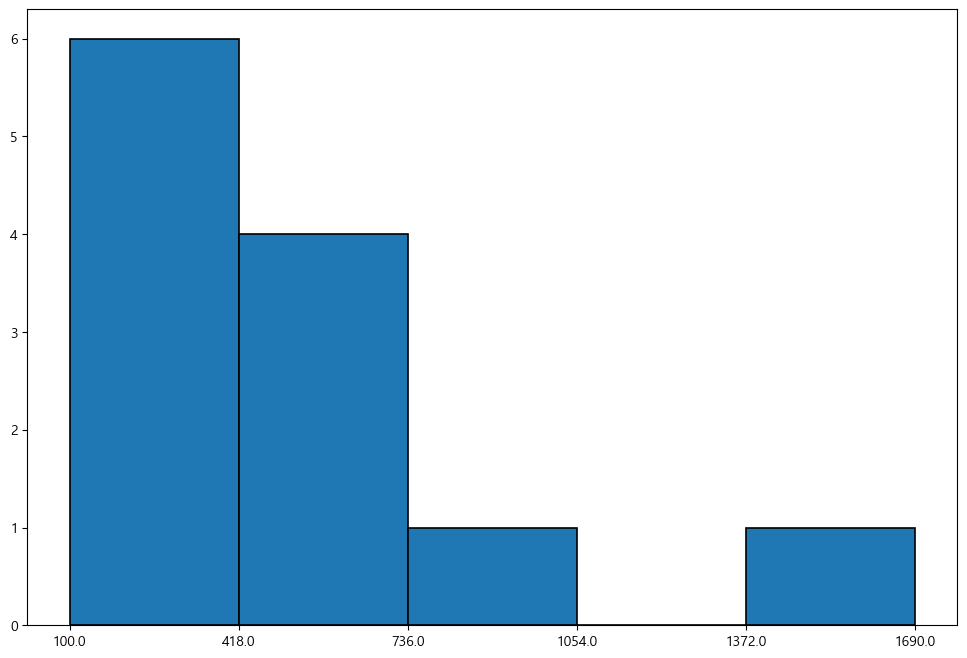

In [17]:
hist, bins = np.histogram(df['매출액(억원)'],bins=5)

plt.figure()
plt.hist(df['매출액(억원)'],bins=5,edgecolor='black',linewidth=1.2)
plt.xticks(bins,bins)
plt.show()
plt.close()

### 3. seaborn 사용

> 23/07/07일 version '0.12.2'에서 sb.set_theme()를 호출하면 기존의 한글 글꼴 설정이 깨짐. sb.set_theme() 호출 이후에 글꼴을 다시 한번 설정해야 함.

- bins : 계급수
- kde : 확률밀도곡선 표시 여부
- stat : 절대, 상대도수 구분. "percent"라고 지정할 경우 상대도수, 기본값은 절대도수
- hue : 범주 지정


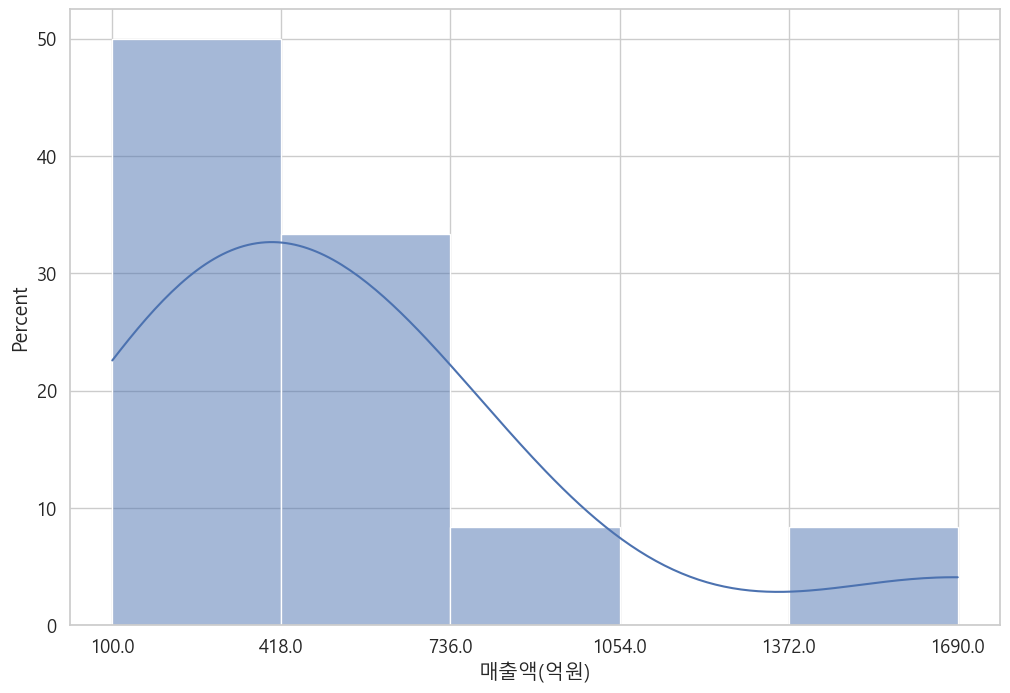

In [21]:
hist, bins = np.histogram(df['매출액(억원)'],bins=5)

plt.figure()
sb.set_theme(style='whitegrid', font='Malgun Gothic', font_scale=1.2)
sb.histplot(data=df,x='매출액(억원)',bins=5,kde=True,stat='percent')
plt.xticks(bins,bins)
plt.show()
plt.close()

In [28]:
## 인덱스를 일반 칼럼으로 변환
df2=df.reset_index()
mdf = melt(df2, id_vars=['월'],value_vars=['광고비(백만원)','매출액(억원)'],
            var_name='구분',value_name="금액")
mdf

,월,구분,금액
0,1월,광고비(백만원),2
1,2월,광고비(백만원),142
2,3월,광고비(백만원),122
3,4월,광고비(백만원),130
4,5월,광고비(백만원),185
5,6월,광고비(백만원),121
6,7월,광고비(백만원),101
7,8월,광고비(백만원),199
8,9월,광고비(백만원),221
9,10월,광고비(백만원),139


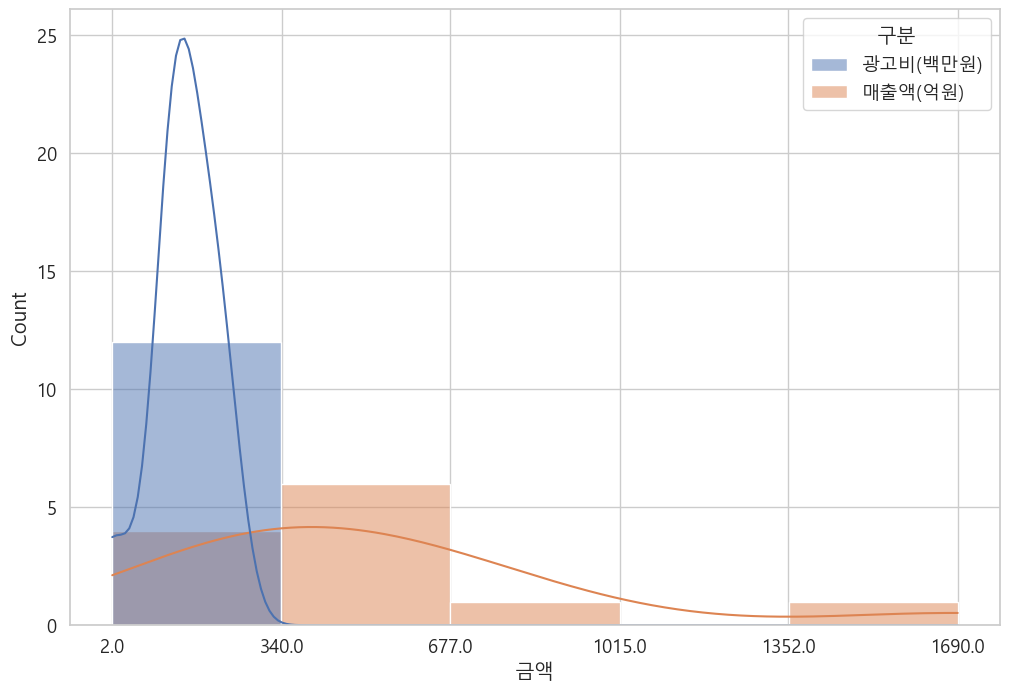

<function matplotlib.pyplot.close(fig=None)>

In [32]:
hist,bins = np.histogram(mdf['금액'],bins=5)
bins2=np.round(bins)

plt.figure()

sb.set_theme(style='whitegrid', font='Malgun Gothic', font_scale=1.2)

sb.histplot(data=mdf,x='금액',hue='구분',kde=True,bins=5)
plt.xticks(bins2,bins2)
plt.show()
plt.close